In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
M = 5000
mu = 1
k_vals = np.arange(1, 8)
n_vals = 400 * k_vals

In [16]:
prob_exceed = np.zeros(len(k_vals))
mse_vals = np.zeros(len(k_vals))

np.random.seed(42)

In [19]:
print("k\tn\tP(|μ̂ - μ| > 0.05)\tMSE")
print("-" * 50)

for i, k in enumerate(k_vals):
    n = n_vals[i]
    eps = stats.t.rvs(df=15, size=(M, n))
    X = mu + eps

    mu_hat = np.mean(X, axis=1)

    dist = np.abs(mu_hat - mu)
    prob_exceed[i] = np.mean(dist > 0.05)

    mse_vals[i] = np.mean((mu_hat - mu)**2)

    print(f"{k}\t{n}\t{prob_exceed[i]:.4f}\t\t{mse_vals[i]:.6f}")


k	n	P(|μ̂ - μ| > 0.05)	MSE
--------------------------------------------------
1	400	0.3416		0.002844
2	800	0.1922		0.001468
3	1200	0.1084		0.000976
4	1600	0.0654		0.000729
5	2000	0.0338		0.000575
6	2400	0.0220		0.000483
7	2800	0.0148		0.000418


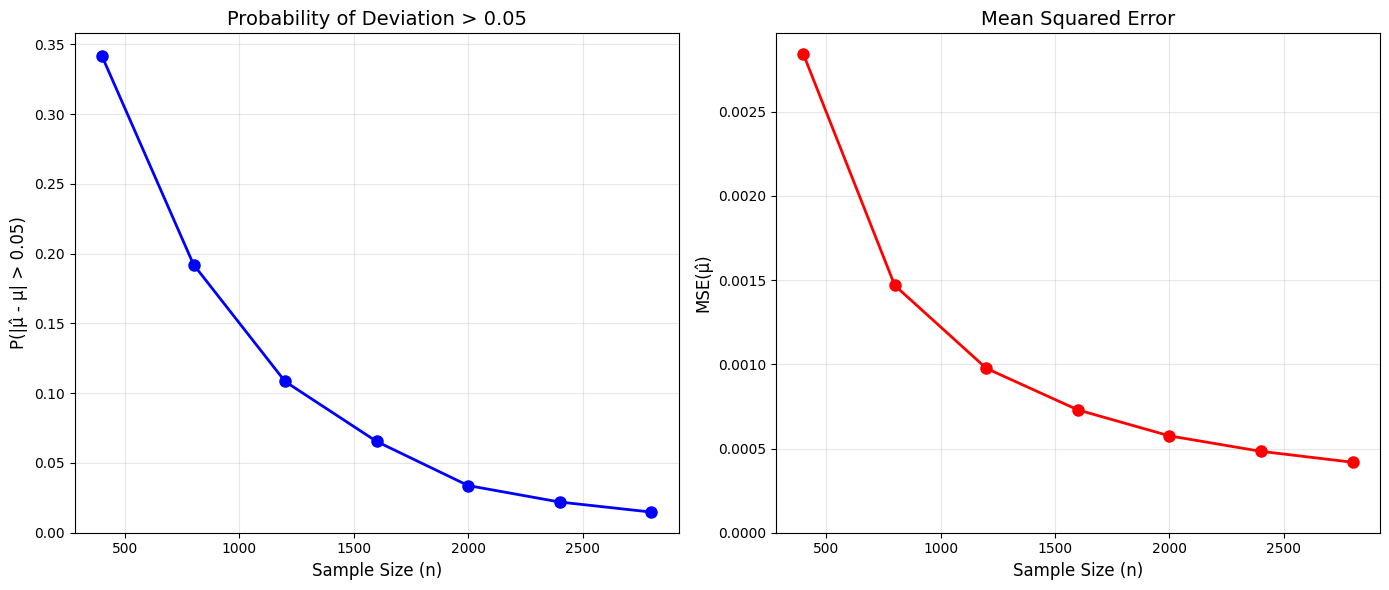

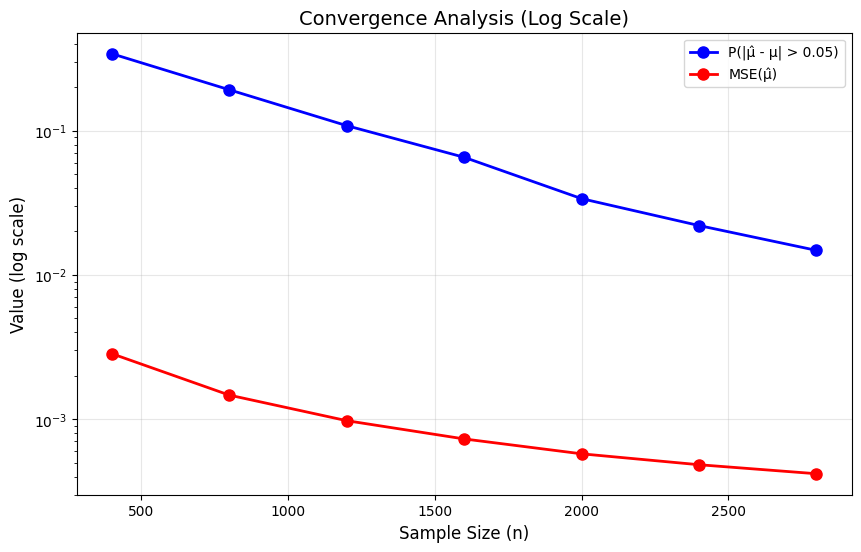


THEORETICAL CONTEXT:
True mean μ = 1
Distribution: X = μ + ε, where ε ~ t(15)
Theoretical variance of t(15): 1.1538
Theoretical variance of sample mean: Var(μ̂) = σ²/n

As n increases:
- P(|μ̂ - μ| > 0.05) should decrease to 0 (convergence in probability)
- MSE(μ̂) should decrease to 0 (consistent estimator)
- This demonstrates the Weak Law of Large Numbers


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Probability of exceeding 0.05
ax1.plot(n_vals, prob_exceed, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Sample Size (n)', fontsize=12)
ax1.set_ylabel('P(|μ̂ - μ| > 0.05)', fontsize=12)
ax1.set_title('Probability of Deviation > 0.05', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)

# Plot 2: Mean Squared Error
ax2.plot(n_vals, mse_vals, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Sample Size (n)', fontsize=12)
ax2.set_ylabel('MSE(μ̂)', fontsize=12)
ax2.set_title('Mean Squared Error', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# Additional analysis: Show convergence more clearly
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.semilogy(n_vals, prob_exceed, 'bo-', linewidth=2, markersize=8, label='P(|μ̂ - μ| > 0.05)')
ax.semilogy(n_vals, mse_vals, 'ro-', linewidth=2, markersize=8, label='MSE(μ̂)')
ax.set_xlabel('Sample Size (n)', fontsize=12)
ax.set_ylabel('Value (log scale)', fontsize=12)
ax.set_title('Convergence Analysis (Log Scale)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Print theoretical context
print("\n" + "="*60)
print("THEORETICAL CONTEXT:")
print("="*60)
print(f"True mean μ = {mu}")
print(f"Distribution: X = μ + ε, where ε ~ t(15)")
print(f"Theoretical variance of t(15): {15/(15-2):.4f}")  # For t(ν), var = ν/(ν-2) when ν > 2
print(f"Theoretical variance of sample mean: Var(μ̂) = σ²/n")
print("\nAs n increases:")
print("- P(|μ̂ - μ| > 0.05) should decrease to 0 (convergence in probability)")
print("- MSE(μ̂) should decrease to 0 (consistent estimator)")
print("- This demonstrates the Weak Law of Large Numbers")
